Could not find GLIMDA.


[1.70731708e+01 2.24895130e-04 4.99994728e+00 1.08333452e-07
 6.24306242e-08 5.03857196e-05 9.00923284e-01 9.00000000e-01
 9.00000000e-01 4.28094237e-09 5.64628407e-20 8.91538027e-13
 1.96138364e-11 1.24154015e-22 3.65029175e-01 8.39567102e-01
 4.86948919e-02 1.50791282e-17 4.72289337e-01 5.91385141e-08
 4.62249441e-07 7.74267814e-07 4.20799865e-13 3.09707126e-07]
[2.89244140e-07 9.68365876e-06 4.87913257e+00 1.08214533e-07
 2.38752041e-01 5.03738626e-05 2.70001937e-01 4.50000000e-01
 4.50000000e-01 8.65672006e-09 1.14051280e-19 2.56881509e-12
 5.65139314e-11 1.03068480e-21 3.65049050e-01 8.39612815e-01
 4.86975433e-02 7.37424772e-17 4.72436941e-01 1.00374402e-07
 7.84767316e-07 1.31448526e-06 8.48663816e-13 5.25794102e-07]
[1.70731706e+01 2.48774022e-04 4.99993372e+00 1.08411063e-07
 9.91826039e-08 5.03934524e-05 7.41980550e-01 9.99994038e-01
 5.87630605e-01 5.77128862e-09 7.61739634e-20 1.20163803e-12
 2.64360364e-11 2.25542579e-22 3.65029177e-01 8.39567106e-01
 4.86948922e-02 2.3595

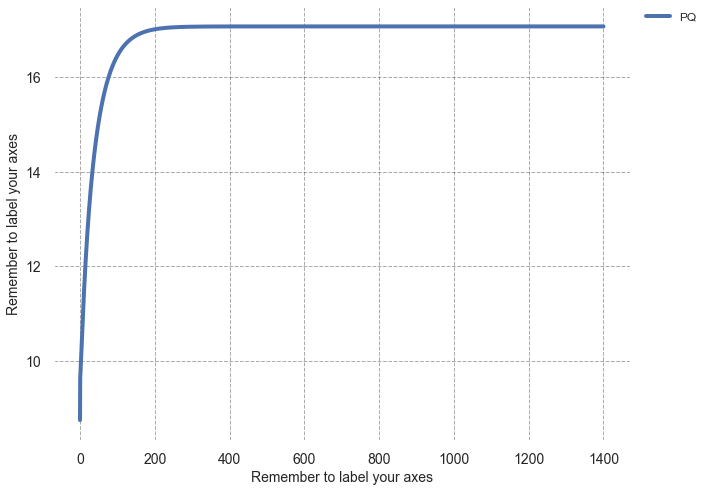

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from modelbase.ode import Simulator
from modelbase.ode import Model

from model import model as m

from y0_new_values import y0dark12, y0dark2, y0high2

In [2]:
light = [100, 200, 500, 750, 1000]

# parameter scan of staticAnt I (0.37)
par_scan = [0.037, 0.15, 0.37, 1.2, 3.7]

In [3]:
y = dict()

In [4]:
y['State1'] = {}
for x in light:
    s = Simulator(m)
    s.update_parameter("gamma1", 0.125)
    s.update_parameter("pfd", x)
    s.initialise(y0dark12)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12})
    y['State1'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [5]:
# investigate how the y dictionary looks like at the moment
y

{'State1': {100: {'Fluo': array([0.14377422, 0.15022458, 0.1519891 , ..., 0.14810075, 0.14810127,
          0.1481018 ]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  200: {'Fluo': array([0.14797533, 0.16030878, 0.1675479 , ..., 0.12063325, 0.12063485,
          0.12063644]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  500: {'Fluo': array([0.16011703, 0.20518533, 0.28942027, ..., 0.10474371, 0.10474634,
          0.10474898]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  750: {'Fluo': array([0.16973696, 0.25274457, 0.57151059, ..., 0.10282195, 0.10282472,
          0.10282748]),
   't': array([0.00000e+00, 9.00000e-02, 1.80000e-01, ..., 1.39990e+03,
          1.39995e+03, 1.40000e+03])},
  1000: {'Fluo': array([0.17893574, 0.30060515, 0.58636138, ..., 0.10220465, 0.10220747,
         

In [6]:
y['State2'] = {}
for x in light:
    s = Simulator(m)
    s.update_parameter("gamma1", 0.125)
    s.update_parameter("pfd", x)
    s.initialise(y0dark2)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    s.simulate(900, steps=10000, **{'atol':1.e-20})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-20})
    y['State2'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [7]:
y['StateNPQ'] = {}

for x in light:
    s = Simulator(m)
    s.update_parameter("gamma1", 0.125)
    s.update_parameter("pfd", x)
    s.initialise(y0high2)
    s.update_parameters({"kProtonationL": 0.0096, "kDeprotonation": 0.0096, "kDeepoxV": 0.0024, "kEpoxZ": 0.00024})
    s.simulate(900, steps=10000, **{'atol':1.e-20})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-20})
    y['StateNPQ'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [8]:
# noticed how much code is still copied? you could create another dictionary of the requirements
# if y.key() == 'State1' then update parameters with this set of parameters

# with PAM

In [9]:
Tmax =1400
dt = 60
pulse=0.8
Tdark = 900

yPAM = dict()

In [10]:
yPAM['State1'] = {}

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("gamma1", 0.125)
    s.update_parameter("pfd", x)
    s.initialise(y0dark12)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-20})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-20})
        t = s.get_time()[-1]
    yPAM['State1'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [11]:
yPAM['State2'] = {}

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("gamma1", 0.125)
    s.update_parameter("pfd", x)
    s.initialise(y0dark2)
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-20})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-20})
        t = s.get_time()[-1]
    yPAM['State2'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

In [12]:
yPAM['StateNPQ'] = {}

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("gamma1", 0.125)
    s.update_parameter("pfd", x)
    s.initialise(y0high2)
    s.update_parameters({"kProtonationL": 0.0096, "kDeprotonation": 0.0096, "kDeepoxV": 0.0024, "kEpoxZ": 0.00024})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-20})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-20})
        t = s.get_time()[-1]
    yPAM['StateNPQ'][x] =  {'Fluo': s.get_variable('Fluo'), 't': s.get_time()} # store the actual time of the simulation

# Plot the results

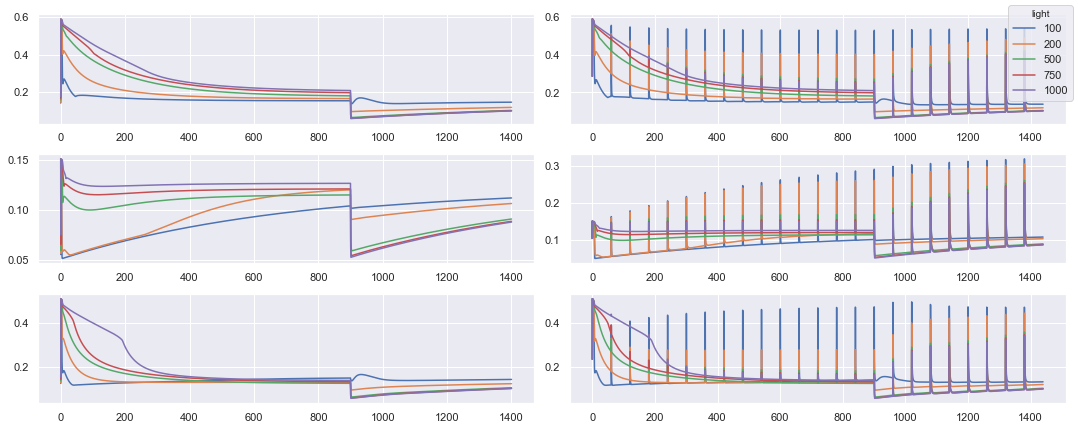

In [13]:
fig, axs = plt.subplots(3,2, figsize=(15, 6), facecolor='w', edgecolor='k')

j = 0
cnt = 0
for i in light: # this is more flexible. If I tell you to include mor elight inetnsities, you just need to ammend the light list
    axs[j][0].plot(y['State1'][i]['t'],y['State1'][i]['Fluo'], label=i)
    axs[+1][0].plot(y['State2'][i]['t'],y['State2'][i]['Fluo'])
    axs[j+2][0].plot(y['StateNPQ'][i]['t'],y['StateNPQ'][i]['Fluo'])
    
    axs[j][1].plot(yPAM['State1'][i]['t'],yPAM['State1'][i]['Fluo'])
    axs[j+1][1].plot(yPAM['State2'][i]['t'],yPAM['State2'][i]['Fluo'])
    axs[j+2][1].plot(yPAM['StateNPQ'][i]['t'],yPAM['StateNPQ'][i]['Fluo'])
    cnt += 1

fig.legend(title='light')#, ncol=3) # add the title to your legend and you can always play with number fo columns if you want to
fig.tight_layout()